In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

series = pd.read_csv('passengers.csv',sep=';', header=0, index_col=0, squeeze=True)
data_ARIMA_cut = series.iloc[0:125,]
data_ARIMA_cut_float = data_ARIMA_cut[:].astype(np.float)
data_ARIMA_cut_float.tail()

month
1959-01    360.0
1959-02    342.0
1959-03    406.0
1959-04    396.0
1959-05    420.0
Name: n_passengers, dtype: float64

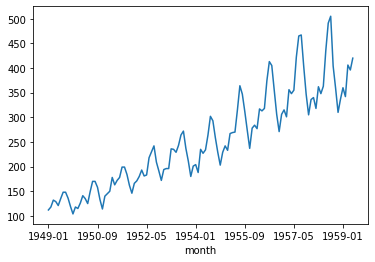

In [2]:
data_ARIMA_cut_float.plot()
plt.show()

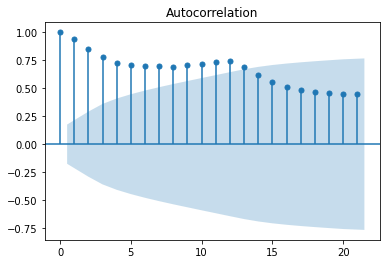

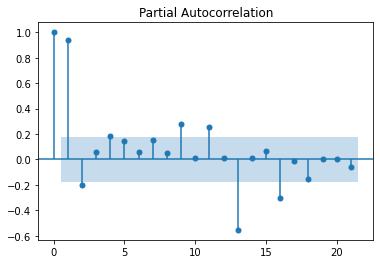

<Figure size 1440x288 with 0 Axes>

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_ARIMA_cut_float)
plot_pacf(data_ARIMA_cut_float)
plt.figure(figsize=(20,4))
plt.show()

/usr/local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


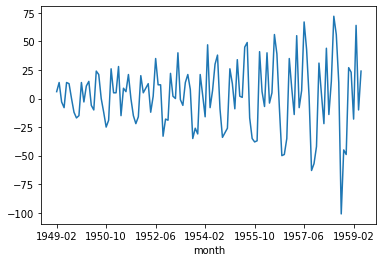

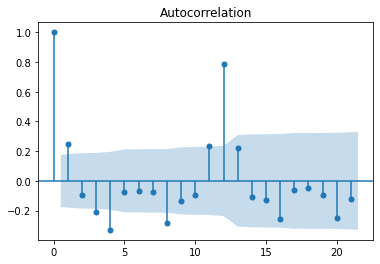

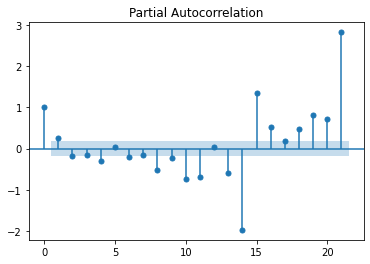

In [4]:
diff_1=data_ARIMA_cut_float.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [5]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(data_ARIMA_cut_float, order=(1,1,0))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.n_passengers   No. Observations:                  124
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -589.100
Method:                       css-mle   S.D. of innovations             27.983
Date:                Wed, 16 Dec 2020   AIC                           1182.200
Time:                        13:03:22   BIC                           1187.841
Sample:                    02-01-1949   HQIC                          1184.492
                         - 05-01-1959                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
ar.L1.D.n_passengers     0.2524      0.087      2.910      0.004       0.082       0.422
                                    Roots                                    
                  Real 

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

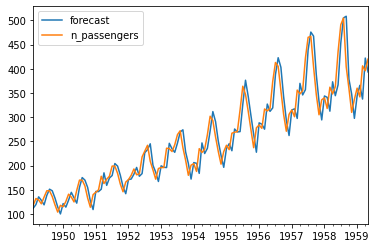

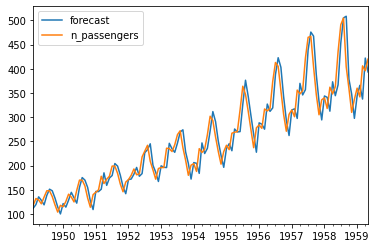

In [6]:
model_fit.plot_predict()

In [7]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([426.05675043]), array([27.98317107]), array([[371.21074295, 480.9027579 ]]))
